In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [47]:
class Neuron:
    
    def __init__(self, E_m, L, d, r_m, r_a, c_m):
        self.E_m = E_m
        self.L   = L
        self.d   = d
        self.r_m = r_m
        self.r_a = r_a
        self.c_m = c_m
        
    def simulate(self, I_t, dt, offset, steps=100):
        '''Simulate membrane voltage response to an arbitraty input current'''
        
        V_t = self.E_m
        rad = self.d/2
        R_m = self.r_m/(4*np.pi*rad**2)
        C_m = self.c_m*(4*np.pi*rad**2)
        tau = R_m*C_m
        
        V_course = [V_t]
        for i in range(steps):
            V_t1 = V_t + dt*(self.E_m - V_t + R_m*I_t)/tau
            V_course.append(V_t1)
            V_t = V_t1
        return V_course
    
    def simulate_sin(self, A, f, dt, offset, steps=100):
        '''Simulate membrane voltage response to a sinusoid input current'''
        V_t  = self.E_m
        rad  = self.d/2
        R_m  = self.r_m/(4*np.pi*rad**2)
        C_m  = self.c_m*(4*np.pi*rad**2)
        tau  = R_m*C_m
        step = dt
        
        V_course = [V_t]
        for j in range(steps):
            I_t   = A*np.sin(2*np.pi*f*step)
            V_t1 = V_t + (dt*(self.E_m - V_t + R_m*I_t))/tau
            V_course.append(V_t1)
            V_t = V_t1
            step += dt
        return V_course

In [48]:
E_m = 0
L   = 100*10**-6
d   = 2*10**-6
r_m = 10
r_a = 1
c_m = 10**-2

a = Neuron(E_m, L, d, r_m, r_a, c_m)

In [51]:
I_t    = -50*10**-12
dt     = 0.001
offset = 0
steps  = 1000
v      = a.simulate(I_t, dt, offset, steps)

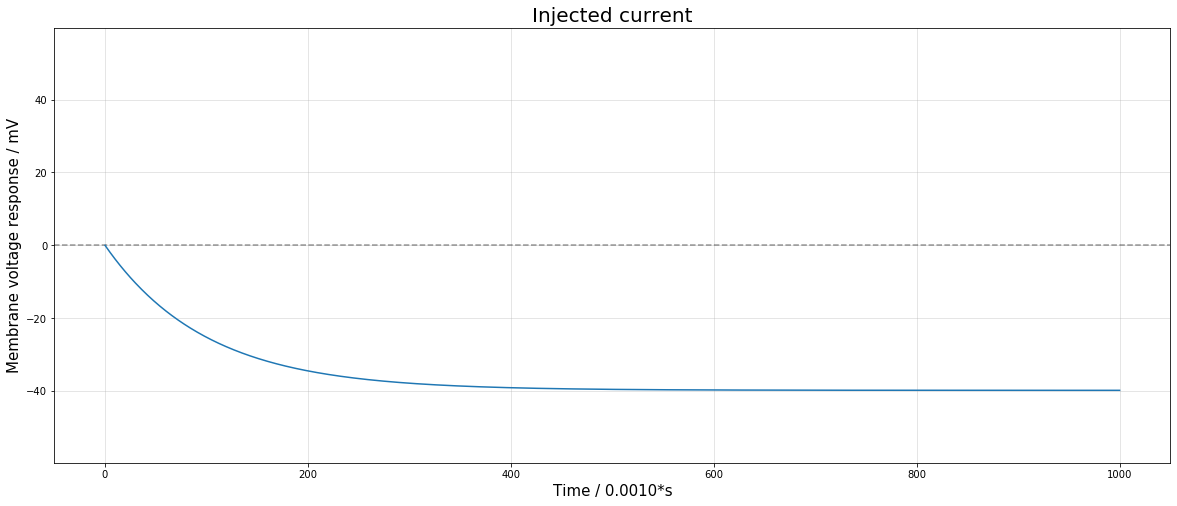

In [52]:
figure = plt.figure(figsize=(20, 8))
plt.ylim(-abs(min(v)*1.5), abs(min(v)*1.5))
plt.axhline(y=0, color='k', linestyle='--', alpha=0.4)
plt.grid(alpha=0.4)
plt.title('Injected current', fontsize=20)
plt.xlabel('Time / %.4f*s'%dt, fontsize=15)
plt.ylabel('Membrane voltage response / mV', fontsize=15)
plt.plot(v)

In [53]:
f      = 100
A      = 100*10**-12
dt     = 0.0001
offset = 0
steps  = 10000
v = a.simulate_sin(A, f, dt, offset, steps)

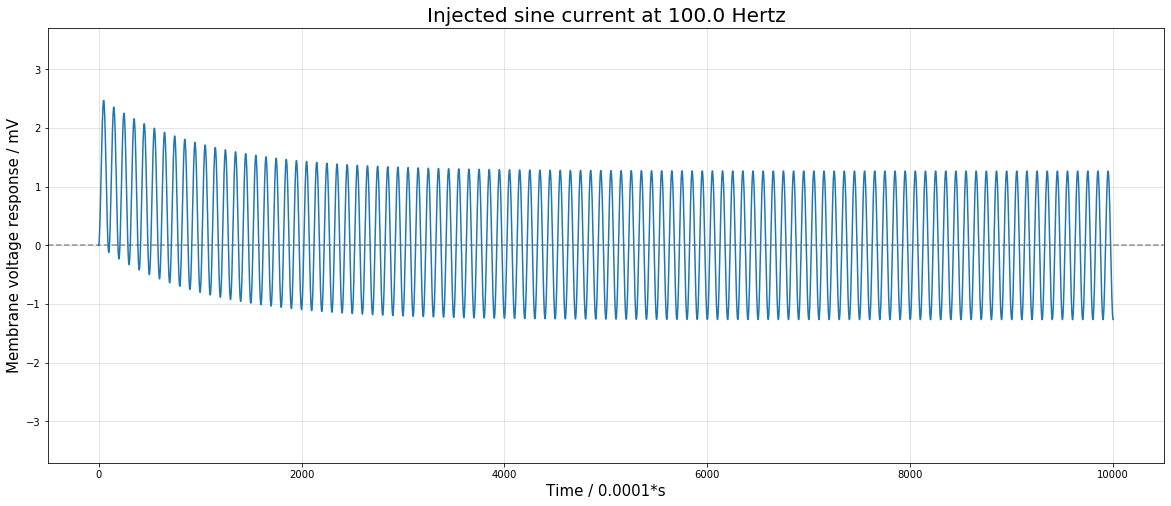

In [54]:
figure = plt.figure(figsize=(20, 8))
plt.ylim(-abs(max(v)*1.5), abs(max(v)*1.5))
plt.axhline(y=0, color='k', linestyle='--', alpha=0.4)
plt.grid(alpha=0.4)
plt.title('Injected sine current at %.1f Hertz' %f, fontsize=20)
plt.xlabel('Time / %.4f*s'%dt, fontsize=15)
plt.ylabel('Membrane voltage response / mV', fontsize=15)
plt.plot(v)

In [10]:
f = [0.5, 1, 2, 8, 100, 1000]
amp = []
for i in range(len(f)):
    curr_f = f[i]
    V = a.simulate_sin(A, curr_f, dt, offset, steps)
    tmp = V[60000:]
    amp.append(max(tmp))
amp = [i/100 for i in amp]

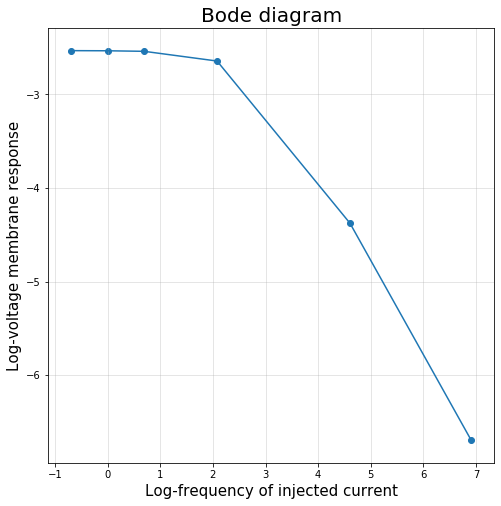

In [12]:
figure = plt.figure(figsize=(8, 8))
plt.grid(alpha=0.4)
plt.xlabel('Log-frequency of injected current', fontsize=15)
plt.ylabel('Log-voltage membrane response', fontsize=15)
plt.title('Bode diagram', fontsize=20)
plt.plot(np.log(f), np.log(amp))
plt.scatter(np.log(f), np.log(amp))